In [1]:
from impy import models as im
from impy.kinematics import CenterOfMass
from impy.constants import GeV
from impy.util import get_all_models

# from util import run_in_separate_process
from particle import literals as lp
import numpy as np
import joblib


In [2]:
energies = np.geomspace(10, 100000, 20) * GeV


@joblib.delayed
def run(Model):
    values = []
    m = Model(CenterOfMass(energies[-1], "p", "p"))
    for en in energies:
        kin = CenterOfMass(en, "p", "p")
        c = m.cross_section(kin)
        values.append(c)
    return values


Models = [M for M in get_all_models() if lp.proton.pdgid in M.projectiles]
cross_sections = {}
out = joblib.Parallel(len(Models), batch_size=1)(run(Model) for Model in Models)
for Model, o in zip(Models, out):
    cross_sections[Model.pyname] = o


 +-----------------------------------------------------------------------+
 |                                                                       |
 |                       DPMJET-III version 19.3.4                       |
 |                                                                       |
 |                      (Last change:  30 Dec 2022)                      |
 |                                                                       |
 |            Authors:                                                   |
 |                     Stefan Roesler     (CERN)                         |
 |                     Anatoli Fedynitch (ASIoP)                         |
 |                     Ralph Engel        (KIT)                          |
 |                     Johannes Ranft     (Siegen Univ.)                 |
 |                                                                       |
 |        https://github.com/afedynitch/dpmjet                           |
 |                       

/Users/hdembinski/Extern/impy/src/impy/models/urqmd.py:203: RuntimeWarning: 13 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/Users/hdembinski/Extern/impy/src/impy/models/urqmd.py:203: RuntimeWarning: 130 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/Users/hdembinski/Extern/impy/src/impy/models/urqmd.py:203: RuntimeWarning: 310 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)
/Users/hdembinski/Extern/impy/src/impy/models/urqmd.py:203: RuntimeWarning: -13 unknown to UrQMD
  warnings.warn(f"{pdgid} unknown to UrQMD", RuntimeWarning)


    2   1.995E+01    1.59   23.87   21.00   10.56   0.024   1.783   0.040
    2   2.512E+01    1.64   24.33   21.49   10.70   0.045   1.756   0.058
 |                                                  |
 |                 S I B Y L L  2.3d                |
 |                                                  |
 |         HADRONIC INTERACTION MONTE CARLO         |
 |                        BY                        |
 |            Eun-Joo AHN, Felix RIEHN              |
 |      R. ENGEL, A. FEDYNITCH, R.S. FLETCHER,      |
 |       T.K. GAISSER, P. LIPARI, T. STANEV         |
 |                                                  |
 | Publication to be cited when using this program: |
 | Eun-Joo AHN et al., Phys.Rev. D80 (2009) 094003  |
 | F. RIEHN et al., hep-ph: 1912.03300              |
        pT0 = 0.89 GeV gives sigma(parton-parton) = 1.08D+02 mb: accepted

 ****** PYMIGN: initialization of multiple interactions for MSTP(82) = 4 ******
 | last modifications: F. Riehn (05/20/2020)     

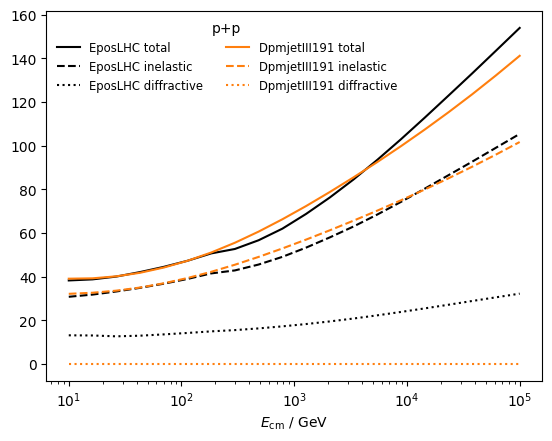

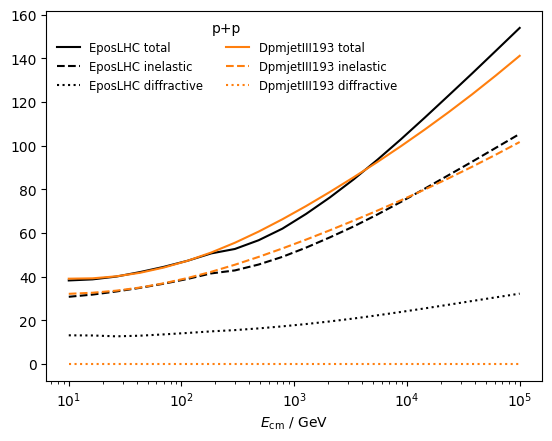

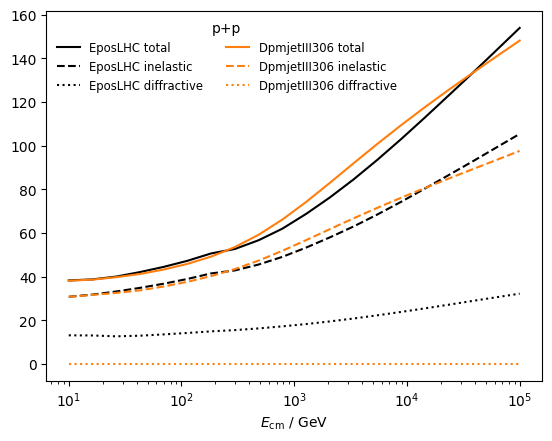

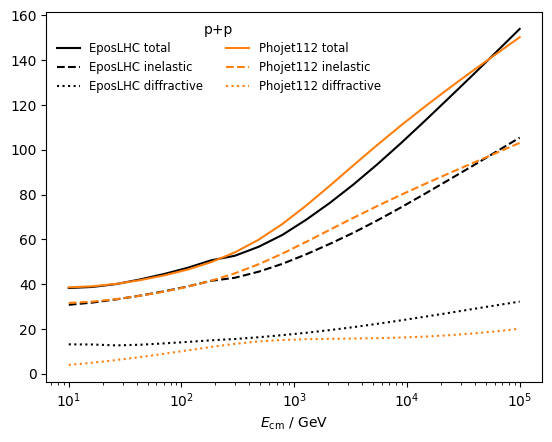

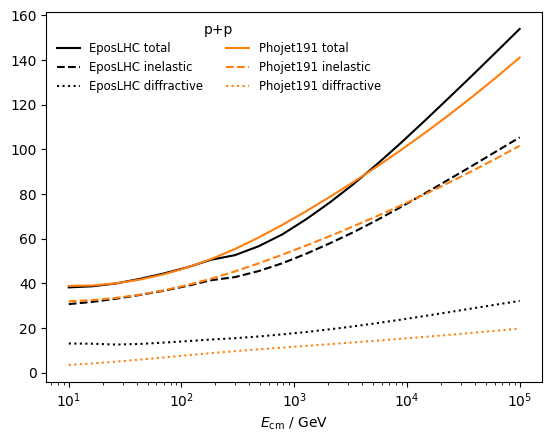

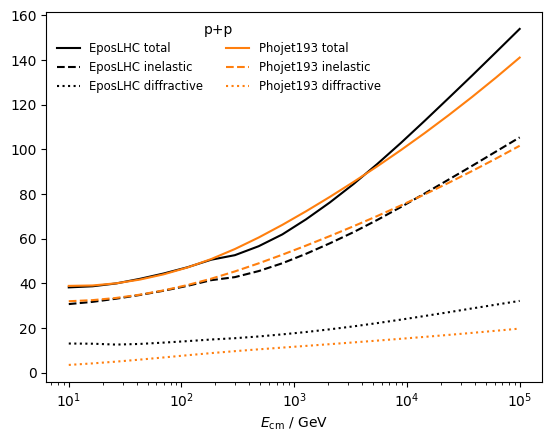

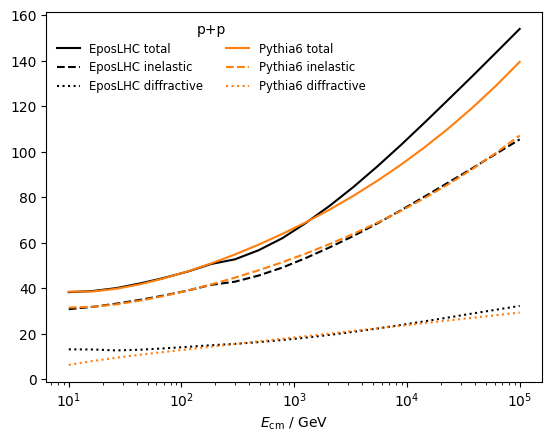

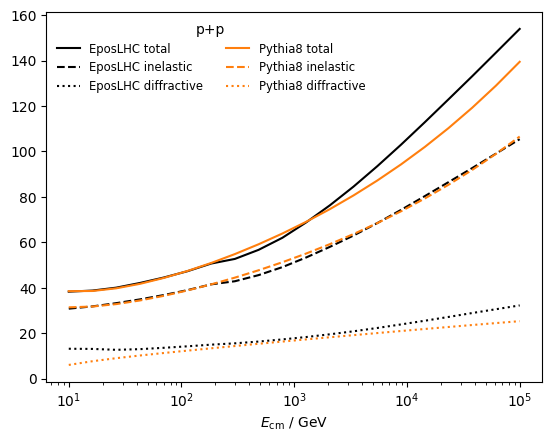

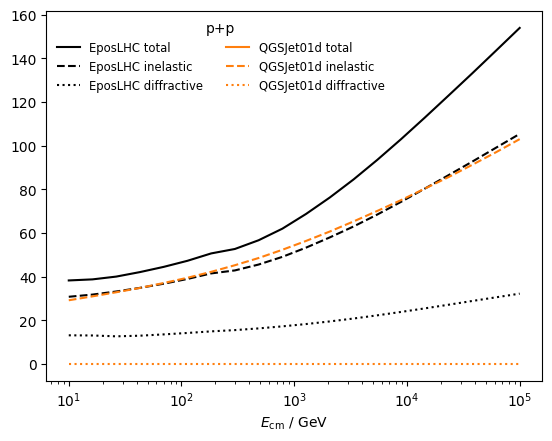

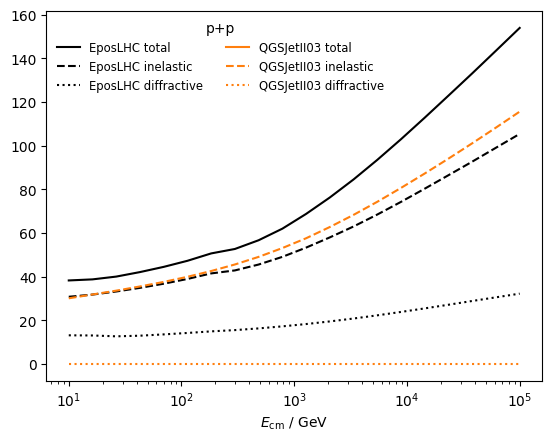

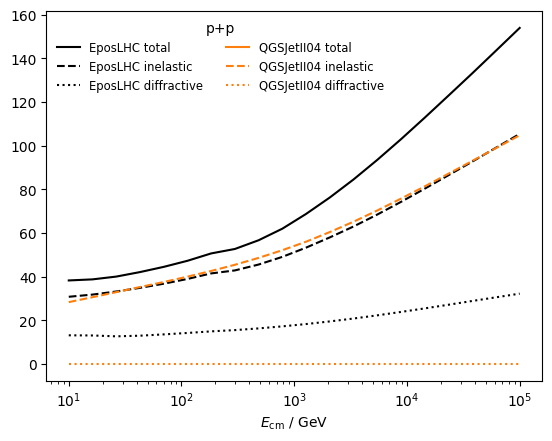

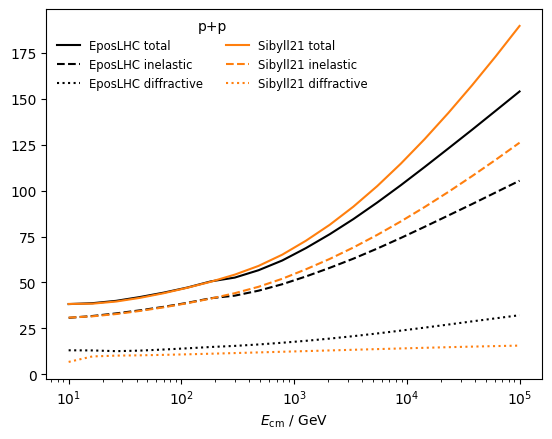

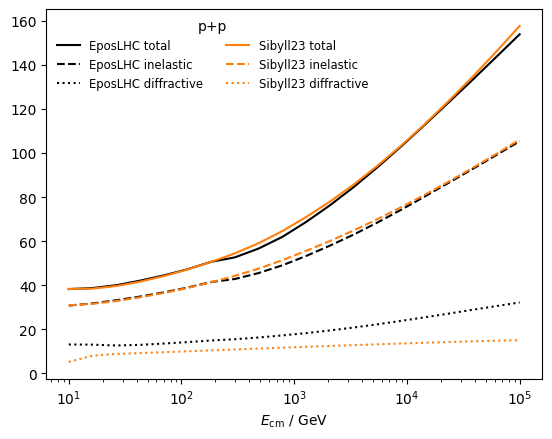

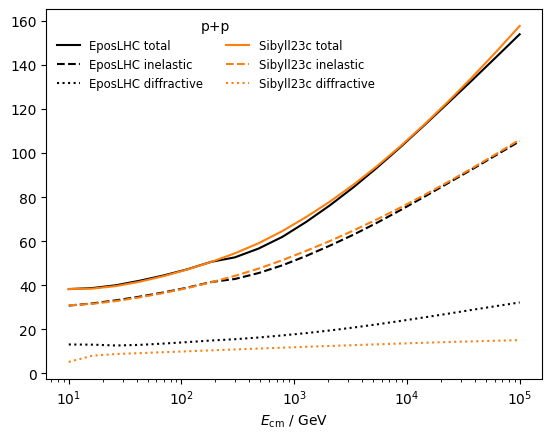

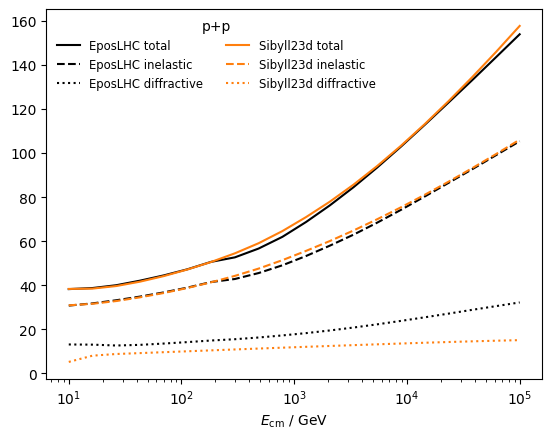

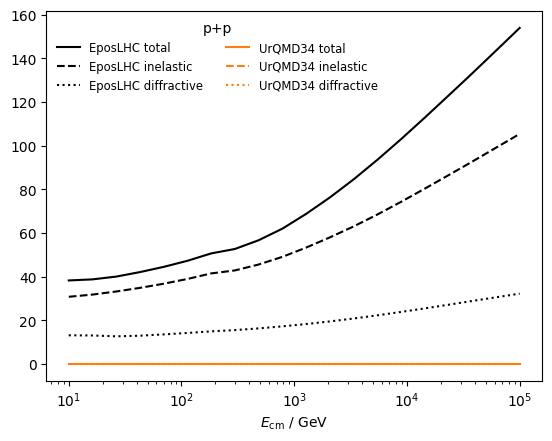

In [7]:
from matplotlib import pyplot as plt
import dataclasses

reference_model = "EposLHC"

for model in cross_sections:
    if model == reference_model:
        continue
    plt.figure()
    kinds = "total", "inelastic", "diffractive"
    for k, model2 in enumerate((reference_model, model)):
        data = cross_sections[model2]
        for i, kind in enumerate(kinds):
            if kind == "diffractive":
                val = [
                    sum(
                        (0 if np.isnan(v) else v)
                        for k, v in dataclasses.asdict(d).items()
                        if "diffractive" in k
                    )
                    for d in data
                ]
            else:
                val = [getattr(d, kind) for d in data]

            if np.any(val != 0):
                plt.plot(
                    energies / GeV,
                    val,
                    label=model2 + " " + kind,
                    ls=["-", "--", ":"][i],
                    color=["k", "C1"][k],
                    zorder=1 + k,
                )
    plt.semilogx()
    plt.legend(frameon=False, ncol=2, fontsize="small", title="p+p")
    plt.xlabel("$E_\\mathrm{cm}$ / GeV")
    